In [1]:
from mlx_vlm import load, generate
import mlx.core as mx
from PIL import Image

model_id = 'mlx-community/Florence-2-base-ft-8bit'
model, processor = load(model_id, {"trust_remote_code": True})

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/603 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/130 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/97.0k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/295M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.75M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/440k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
prompt = "<OCR_WITH_REGION>"
image = "images/menu.webp"


In [4]:
generated_text = generate(model, processor, image, prompt, temp=0.8, max_tokens=100000, verbose=True)
image = Image.open(image)
parsed_answer = processor.post_process_generation("".join(generated_text) + "</s>", task=prompt, image_size=(image.width, image.height))

Image: images/menu.webp 

Prompt: <OCR_WITH_REGION>
<s>BORCELE<loc_171><loc_81><loc_389><loc_80><loc_390><loc_105><loc_171><loc_106>Coffee Shop<loc_98><loc_139><loc_397><loc_140><loc_396><loc_191><loc_97><loc_189>MENU<loc_109><loc_196><loc_530><loc_195><loc_531><loc_272><loc_109><loc_273>COFFEE<loc_146><loc_370><loc_316><loc_372><loc_315><loc_396><loc_145><loc_395>Espresso<loc_156><loc_422><loc_259><loc_423><loc_258><loc_439><loc_155><loc_438>5<loc_454><loc_424><loc_488><loc_424><loc_489><loc_437><loc_455><loc_437>Macchiato<loc_570><loc_422><loc_687><loc_422><loc_688><loc_439><loc_570><loc_440>5<loc_872><loc_422><loc_901><loc_423><loc_899><loc_438><loc_871><loc_437>Double Espresso<loc_156><loc_443><loc_341><loc_444><loc_341><loc_461><loc_155><loc_460>$5<loc_455><loc_441><loc_489><loc_440><loc_488><loc_459><loc_454><loc_458>Flat White<loc_568><loc_443><loc_683><loc_444><loc_682><loc_461><loc_568><loc_460>$5<loc_869><loc_445><loc_902><loc_445><loc_901><loc_459><loc_868><loc_458>Latte<loc

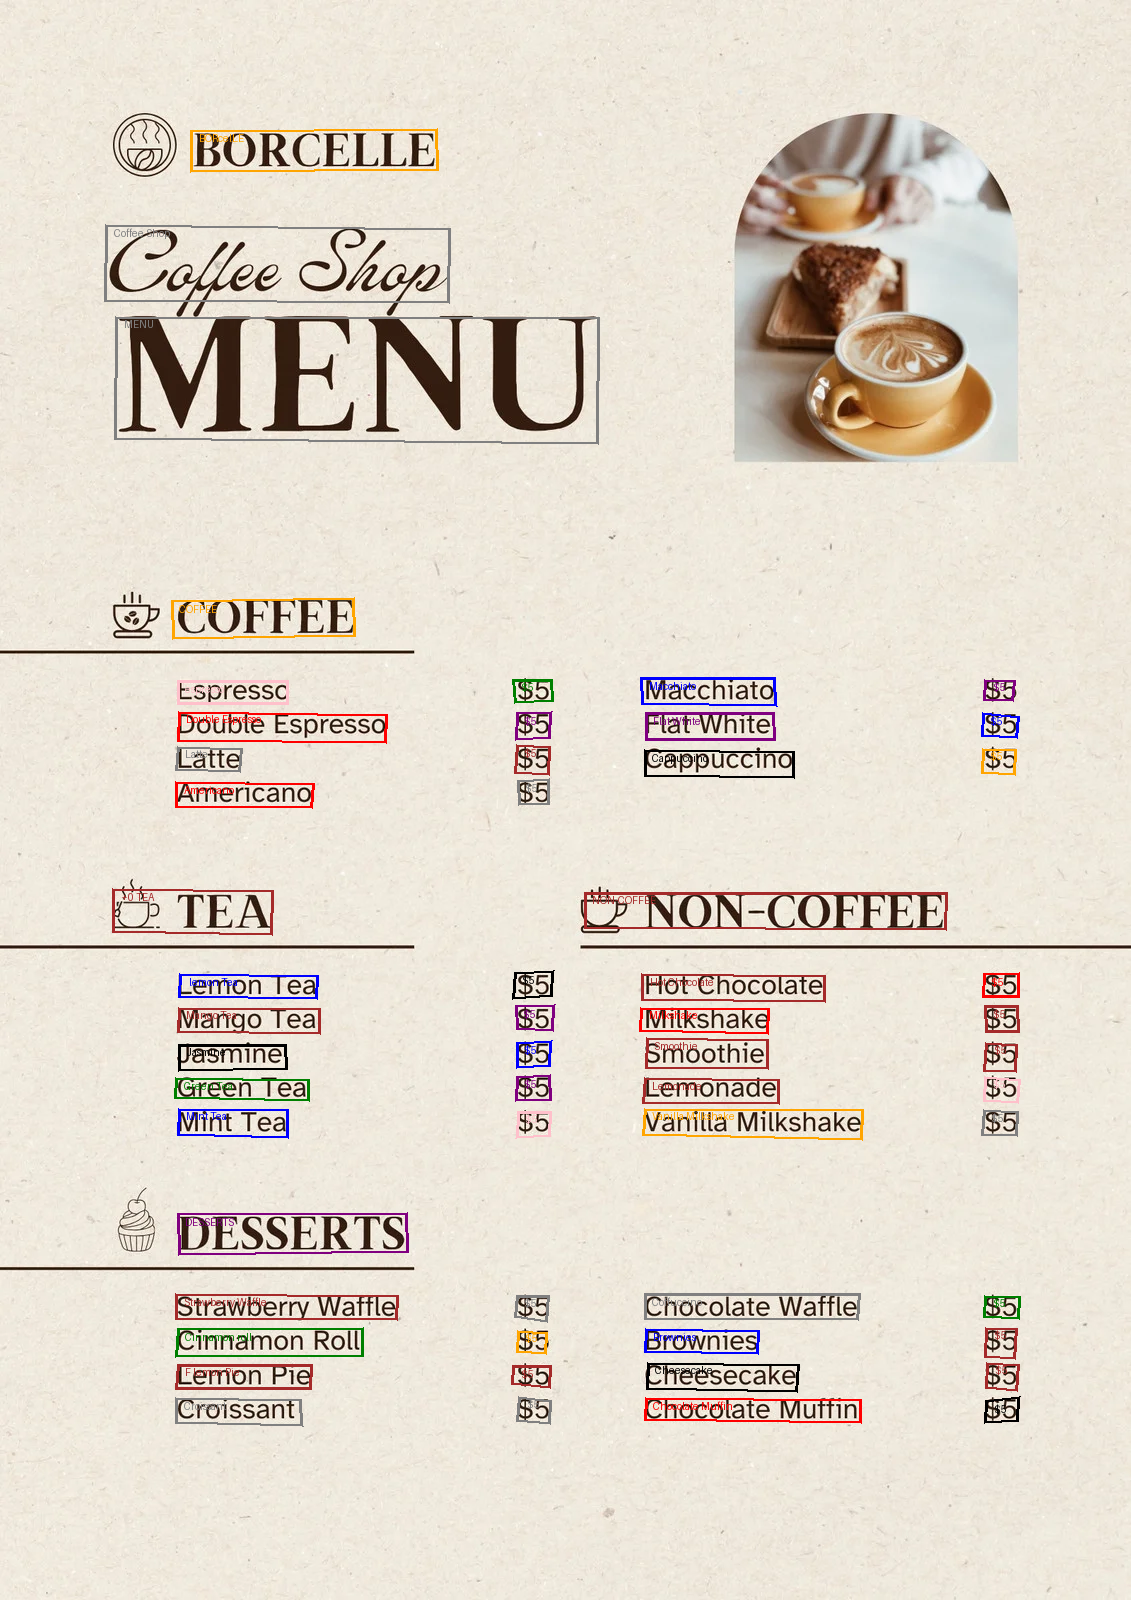

In [7]:
import random
import numpy as np
from PIL import ImageDraw

colormap = ['red', 'blue', 'green', 'gray', 'purple', 'orange', 'pink', 'brown', 'gray', 'black']
def draw_ocr_bboxes(image, prediction, scale=1):
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)

    display(image)


draw_ocr_bboxes(image, parsed_answer["<OCR_WITH_REGION>"])